<a href="https://colab.research.google.com/github/olowu289/Deep-learning-machine-learning-project/blob/main/malaria_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### welcome speech 
welcome to another lovely project which is malaria test using deep learning.


In [ ]:
# let import the useful liabaries 
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [ ]:
# let download our helper funtions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-02 04:51:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-02 04:51:20 (74.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# let get our dataset ready 
!unzip /content/drive/MyDrive/tensorflow_dataset/malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

In [ ]:
from helper_functions import walk_through_dir

In [ ]:
walk_through_dir("/content/cell_images")

There are 3 directories and 0 images in '/content/cell_images'.
There are 2 directories and 0 images in '/content/cell_images/cell_images'.
There are 0 directories and 13780 images in '/content/cell_images/cell_images/Parasitized'.
There are 0 directories and 13780 images in '/content/cell_images/cell_images/Uninfected'.
There are 0 directories and 13780 images in '/content/cell_images/Parasitized'.
There are 0 directories and 13780 images in '/content/cell_images/Uninfected'.


In [ ]:
# let set our train dir
train_dir= "/content/cell_images/cell_images"

In [ ]:
image_size= (100, 100)

In [ ]:
# let setup our traning data
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               label_mode="categorical",
                                                               image_size=image_size,
                                                               validation_split=0.2,
                                                               seed=42,
                                                               subset="training",
                                                               )

val_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               label_mode="categorical",
                                                               image_size=image_size,
                                                               validation_split=0.2,
                                                               seed=42,
                                                               subset="validation")

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [ ]:
#let set up our class names 
class_names=train_data.class_names
class_names

['Parasitized', 'Uninfected']

### Time to visulized our data

In [ ]:
# import the useful liabaries 
import os
import matplotlib.image as mpimg

In [ ]:
#let define a funtion to view random images 
def view_random_image(target_dir, target_class):
  target_folder= target_dir + target_class

  random_image=random.sample(os.listdir(target_folder), 1)

  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image_shape{img.shape} ")

image_shape(142, 136, 3) 


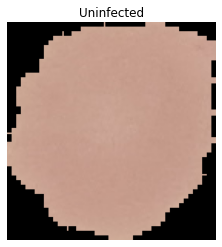

In [ ]:
view_random_image(target_dir="/content/cell_images/cell_images/", target_class=random.choice(class_names))

image shape:(32, 100, 100, 3) 
image shape:(32, 100, 100, 3) 


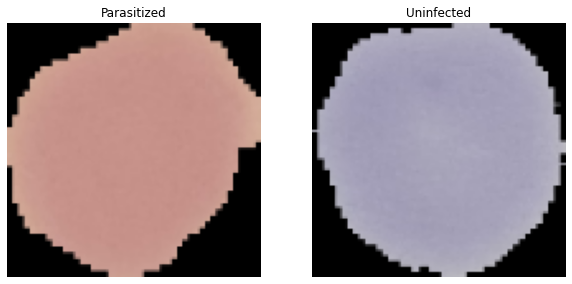

In [ ]:
plt.figure(figsize=(10, 10))

for images, label in train_data.take(1):
  for image in range(2):
    ax=plt.subplot(1, 2, image+1)
    plt.imshow(images[image].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[image])

    print(f"image shape:{images.shape} ")


### Creating data_augmentation


In [ ]:
# let import the useful liabaries 
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential

In [ ]:
data_augumentation=Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomWidth(0.2)
], name="data_augentation")

In [ ]:
#let define a funtion to view random images 
def view_augmented_and_random_image(target_dir, target_class):
  target_folder= target_dir + target_class

  random_image=random.sample(os.listdir(target_folder), 1)

  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(f"Normal image from class: {target_class} ")
  plt.axis("off")

  augmented_image=data_augumentation(img)
  plt.figure()
  plt.imshow(augmented_image)
  plt.title(f"Augmented random image from class:{ target_class} ")
  plt.axis("off")

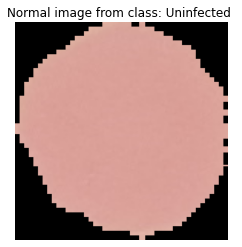

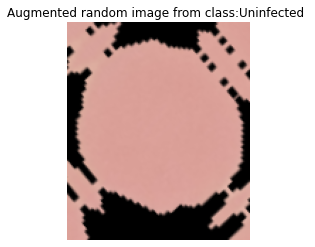

In [ ]:
view_augmented_and_random_image(target_dir="/content/cell_images/cell_images/", target_class=random.choice(class_names))

### Let setup our callbacks

In [ ]:
# Let set up our call back path
checkpoint_path= "malaria_checkpoint"

checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                               monitor="val_loss",
                                               save_weights_only=True,
                                               save_best_model=False)



# we are setting this so that when traninig, our learning rate will be updated as we train our model
reduce_lr= tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 patience= 4,
                                                 verbose=1,
                                                 min_delta=0.0001,
                                                 factor=0.2
                                                 )

### Building model 0

In [ ]:
# let set up our 
image_size= (100, 100, 3)
batch_size=32

In [ ]:
# let import the useful liabaries
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Input,Dense, UpSampling2D

In [ ]:
# base model
base_model= tf.keras.applications.EfficientNetB2(include_top=False)
base_model.trainable= False

input_layer=Input(shape=image_size, name="input_layer")
# let pass our image into our data_augmentation
x=UpSampling2D(size=(3, 3))(input_layer)
x= data_augumentation(x)
# let now pass it to our base_model
x=base_model(x, training=False)
# let pass it to our GlobalAveragePooling2D layer
x= GlobalAveragePooling2D()(x)
# let now pass it to our dense layer 
x= Dense(128, activation="relu")(x)
output_layer= Dense(len(class_names), activation="sigmoid")(x)
# let build our model
model_0= Model(input_layer, output_layer)

In [ ]:
#let get the summary of our model
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 up_sampling2d_1 (UpSampling  (None, 300, 300, 3)      0         
 2D)                                                             
                                                                 
 data_augentation (Sequentia  (None, 300, 300, 3)      0         
 l)                                                              
                                                                 
 efficientnetb2 (Functional)  (None, None, None, 1408)  7768569  
                                                                 
 global_average_pooling2d_1   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                           

In [ ]:
# let compile and fit our model
model_0.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# let fit our model
history_0= model_0.fit(train_data,
                       epochs=15,
                       steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps= len(val_data),
                       callbacks=[checkpoint, reduce_lr])

Epoch 1/15
689/689 [==============================] - 419s 579ms/step - loss: 0.2074 - accuracy: 0.9245 - val_loss: 0.1610 - val_accuracy: 0.9445 - lr: 0.0010
Epoch 2/15
689/689 [==============================] - 315s 457ms/step - loss: 0.1772 - accuracy: 0.9358 - val_loss: 0.1592 - val_accuracy: 0.9463 - lr: 0.0010
Epoch 3/15
689/689 [==============================] - 265s 384ms/step - loss: 0.1698 - accuracy: 0.9378 - val_loss: 0.1892 - val_accuracy: 0.9379 - lr: 0.0010
Epoch 4/15
689/689 [==============================] - 240s 347ms/step - loss: 0.1654 - accuracy: 0.9388 - val_loss: 0.1596 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 5/15
689/689 [==============================] - 227s 329ms/step - loss: 0.1605 - accuracy: 0.9428 - val_loss: 0.1647 - val_accuracy: 0.9459 - lr: 0.0010
Epoch 6/15
689/689 [==============================] - ETA: 0s - loss: 0.1569 - accuracy: 0.9443
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
689/689 [=======================

Wow, nice work, 91% accuracy, not bad.
let plot our loss curve

In [ ]:
from helper_functions import plot_loss_curves, compare_historys

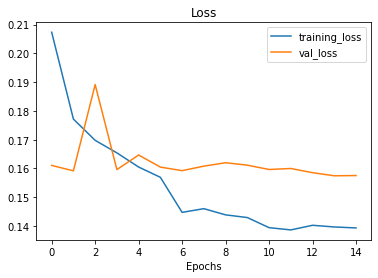

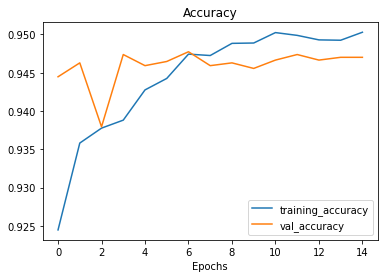

In [ ]:
plot_loss_curves(history_0)

### Fine turn

In [ ]:
# let view our base model layer

for layer_number,layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable) 

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block2a_expand_conv False
30 block2a_expand_bn False
31 block2a_expand_activation False
32 block2a_dwconv_pad False
33 block2a_dwconv False
34 block2a_bn False
35 block2a_activation False
36 block2a_se_squeeze False
37 block2a_se_reshape False
38 block2a_se_reduce False
39 block2a_s

In [ ]:
# let unfreezed all the layers of our base model
base_model.trainable= True

# let unfreezed the last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable=False

In [ ]:
# let view our base model layer again

for layer_number,layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable) 

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block2a_expand_conv False
30 block2a_expand_bn False
31 block2a_expand_activation False
32 block2a_dwconv_pad False
33 block2a_dwconv False
34 block2a_bn False
35 block2a_activation False
36 block2a_se_squeeze False
37 block2a_se_reshape False
38 block2a_se_reduce False
39 block2a_s

In [ ]:
history_0.epoch[-1]

14

In [ ]:
#let set our fine ti=urn epochs
fine_turn_epochs=25

# let compile and fit our model again
model_0.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# let fit our model
history_fine_turn= model_0.fit(train_data,
                       epochs=fine_turn_epochs,
                       steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps= len(val_data),
                       initial_epoch=history_0.epoch[-1],
                       callbacks=[checkpoint, reduce_lr])

Epoch 15/25
689/689 [==============================] - 176s 242ms/step - loss: 0.1821 - accuracy: 0.9371 - val_loss: 0.1649 - val_accuracy: 0.9497 - lr: 0.0010
Epoch 16/25
689/689 [==============================] - 160s 231ms/step - loss: 0.1468 - accuracy: 0.9492 - val_loss: 0.2138 - val_accuracy: 0.9376 - lr: 0.0010
Epoch 17/25
689/689 [==============================] - 158s 230ms/step - loss: 0.1420 - accuracy: 0.9484 - val_loss: 0.1937 - val_accuracy: 0.9418 - lr: 0.0010
Epoch 18/25
689/689 [==============================] - 154s 223ms/step - loss: 0.1353 - accuracy: 0.9502 - val_loss: 0.2001 - val_accuracy: 0.9247 - lr: 0.0010
Epoch 19/25
689/689 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9528
Epoch 19: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
689/689 [==============================] - 153s 222ms/step - loss: 0.1327 - accuracy: 0.9528 - val_loss: 0.1669 - val_accuracy: 0.9519 - lr: 0.0010
Epoch 20/25
689/689 [================

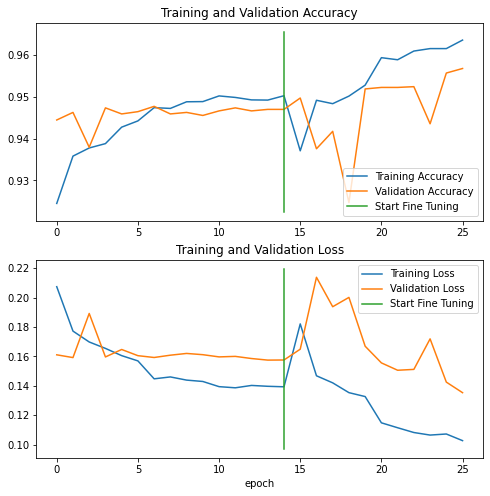

In [ ]:
# let compare our models history
compare_historys(history_0, history_fine_turn, 15)

In [ ]:
# let save our model
saved_model=tf.keras.models.save_model(model_0, "drive/MyDrive/malarial_model_using_effcientnetb2")

INFO:tensorflow:Assets written to: drive/MyDrive/malarial_model_using_effcientnetb2/assets


### Making predictions with our saved model

In [ ]:
# let loadin our saved model
model= tf.keras.models.load_model("drive/MyDrive/malarial_model_using_effcientnetb2")

In [ ]:
# let evaluate our load model to see if its the same b4 and after we saved it
model.evaluate(val_data)

173/173 [==============================] - 632s 4s/step - loss: 0.1353 - accuracy: 0.9568


[0.13529354333877563, 0.956813633441925]

In [ ]:
# let make prediction on our val_data
model.predict(val_data, verbose=1)

173/173 [==============================] - 639s 4s/step


array([[9.9998736e-01, 1.0666858e-05],
       [1.0000000e+00, 6.7078312e-09],
       [1.0000000e+00, 1.4013092e-21],
       ...,
       [1.9809604e-04, 9.9980158e-01],
       [3.0204818e-01, 7.3608565e-01],
       [9.8646414e-01, 1.1341095e-02]], dtype=float32)